
# **Project 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [1]:
# Import the necessary libraries
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for creating various visualizations  
from matplotlib import pyplot as plt # used for creating plots and figures
import pylab # used for used for importing functions from matplotlib for easier plotting
import pingouin as pg # used for statistical tests

# Read and name the file  
df_mh = pd.read_csv('MillerHadenData.csv')



In [125]:
# Q1a (code):
# Display first few rows of the dataframe
df_mh.head()

,Participant,Abil,IQ,Home,TV,Rank_Abil,Rank_Home
0,1,61,107,144,487,High,Frequent
1,2,56,109,123,608,High,Infrequent
2,3,45,81,108,640,Low,Infrequent
3,4,66,100,155,493,High,Frequent
4,5,49,92,103,636,Low,Infrequent


In [26]:
# Check data types and information
df_mh.describe()

,Participant,Abil,IQ,Home,TV
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,13.000000,55.120000,100.040000,124.000000,599.920000
std,7.359801,6.084954,9.043782,21.039645,95.056965
min,1.000000,45.000000,81.000000,87.000000,407.000000
25%,7.000000,50.000000,95.000000,108.000000,523.000000
50%,13.000000,54.000000,100.000000,123.000000,636.000000
75%,19.000000,61.000000,104.000000,141.000000,673.000000
max,25.000000,67.000000,118.000000,161.000000,787.000000


<div class="alert-info">
The data appears to be ratio, as there is a true 0 point (e.g. Abil = 0 means that there is no reading ability, etc.)
</div>


In [25]:
# In addition, we can get another quick overview of a dataset
df_mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


In [46]:
# Q1b (code):
# Check for missing values in IQ and Reading Ability (Abil)
if df_mh[['IQ', 'Abil']].isnull().values.any():
    print("There are missing values in IQ or Abil.")
else:
    print("There are no missing values in IQ or Abil.")

# Check whether there is a data point for each participant on both IQ and Abil
if len(df_mh[['IQ', 'Abil']].dropna()) == len(df_mh):
    print("There is a data point for each participant on both IQ and Abil.")
else:
    print("There are missing data points for some participants on IQ or Abil.")


There are no missing values in IQ or Abil.
There is a data point for each participant on both IQ and Abil.


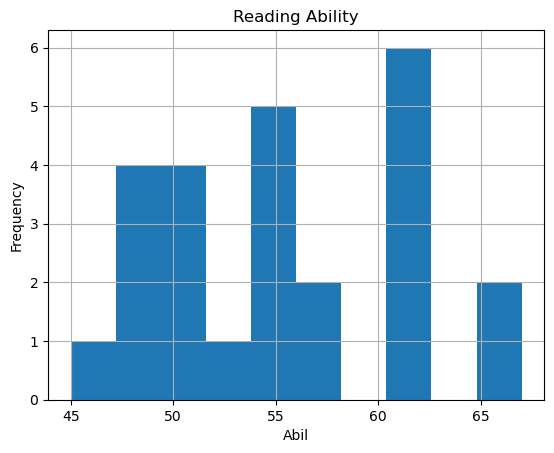

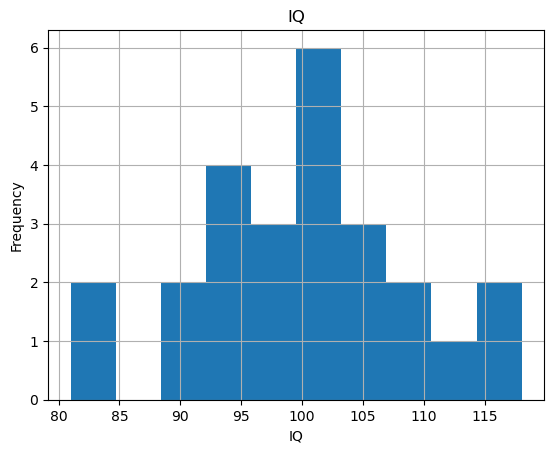

Shapiro-Wilk test for Abil: p-value = 0.2354886382818222
Shapiro-Wilk test for IQ: p-value = 0.4908201992511749


In [71]:
# Q1c (code):
# Check data distribution

#Plot for Reading Ability
plt.figure()
df_mh['Abil'].hist()
plt.title('Reading Ability')
plt.xlabel('Abil')
plt.ylabel('Frequency')
plt.show()

#Plot for IQ
plt.figure()
df_mh['IQ'].hist()
plt.title('IQ')
plt.xlabel('IQ')
plt.ylabel('Frequency')
plt.show()

# We can also do the Shapiro-Wilk test using scipy 
import scipy.stats as stats

# H0: the data is normally distributed (p-value > 0.05)
# H1: the data is nor normally distributed (p-value < 0.05)

reading_ability_and_IQ = ['Abil', 'IQ']  

for var in reading_ability_and_IQ:
    stat, p_val = stats.shapiro(df_mh[var])
    print(f"Shapiro-Wilk test for {var}: p-value = {p_val}")


<div class="alert-info">
The data appears to be normally distributed, as the p-values > 0.05.
</div>


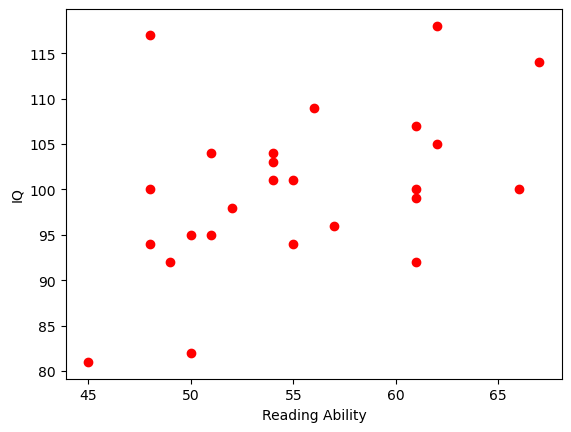

In [126]:
# Q1d (code):
# Assigning variables for the scatter plot
Abil = df_mh['Abil']
IQ = df_mh['IQ']
             
# Scatter plot

plt.scatter(Abil, IQ, c="r")
plt.xlabel("Reading Ability") 
plt.ylabel("IQ")
plt.show()


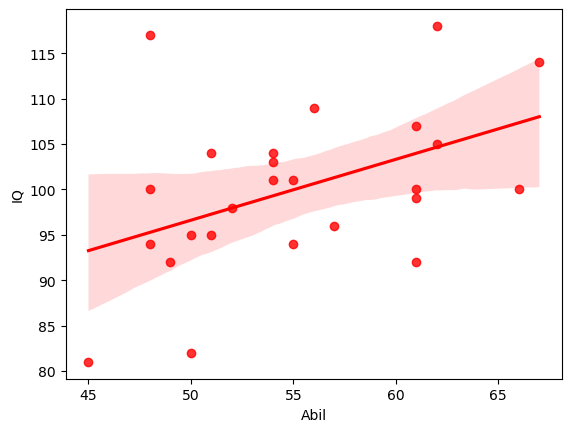

In [54]:
# Q1e (code):
# To have a better understanding of the correlation strength, we can add a correlation line
# Correlation line
plot_corr_sns = sns.regplot(x="Abil", y="IQ", color="r", data=df_mh)


<div class="alert-info">
In this plot we can see the positive correlation between IQ and Reading Ability (the regression line is going upwards; with the IQ values increasing, Abil values increase as well).
</div>


**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

In [72]:
# Q2a (answer with words):

<div class="alert-info">
Since our data is ratio, and both variables have normally distributed data (Shapiro-Wilk test indicated the p-values > 0.05), 
we can use the Pearson correlation test.
</div>

In [73]:
# Q2b (code):
corr_IQ_Abil = pg.corr(IQ, Abil)
print(corr_IQ_Abil)

          n        r         CI95%     p-val   BF10     power
pearson  25  0.45117  [0.07, 0.72]  0.023593  2.804  0.640299


In [60]:
# Q2c (answer with words):

<div class="alert-info">
    
***Direction:*** the correlation coefficient (r) between IQ and Reading Ability (Abil) is approximately 0.45. 
Since the correlation coefficient is positive (0.45), it indicates a positive association between IQ and Reading Ability. 
This means that as IQ increases, Reading Ability tends to increase as well.

***Strength:*** the strength of the association can be interpreted based on the magnitude of the correlation coefficient (r). 
A correlation coefficient of 0.45 suggests a low to moderate positive correlation between IQ and Reading Ability.
</div>

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

In [61]:
# Q3a (answer in words):


<div class="alert-info">
    
$H_0$: Reading ability and amount of time spent reading at home are independent (there is no association between the variables).

$H_1$：Reading ability and amount of time spent reading at home are associated.
    
</div>

In [63]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  # used for data wrangling/manipulation
from scipy.stats import chi2_contingency # used for statistical tests (here, the Chi-Square test)

# Define the rounded average for Reading Ability and Home
rounded_average_Abil = round(df_mh['Abil'].mean())
rounded_average_Home = round(df_mh['Home'].mean())

# We create these categories to divide the participants into two groups based on their respective average scores. 
# This categorization allows further analysis(e.g. as examining differences in reading habits between children with low vs. 
# high reading ability or between those who read at home infrequently vs. frequently).

# Create the Rank_Abil column
df_mh['Rank_Abil'] = 'Low'  # Initialize Rank_Abil column with 'Low'
df_mh.loc[df_mh['Abil'] > rounded_average_Abil, 'Rank_Abil'] = 'High'

# Create the Rank_Home column
df_mh['Rank_Home'] = 'Infrequent'  # Initialize Rank_Home column with 'Infrequent'
df_mh.loc[df_mh['Home'] > rounded_average_Home, 'Rank_Home'] = 'Frequent'

In [66]:
# Q3c (code):
# Construct Contingency Matrix

# We need the contingency matrix to organize and summarize the data, which is necessary for conducting the chi-square test 
# and determine whether there is a significant association between the frequency of home reading and reading abilities.

contingency_matrix = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])

# Display the contingency matrix
contingency_matrix

Rank_Home,Frequent,Infrequent
Rank_Abil,,
High,8,2
Low,3,12


In [69]:
# Q3d (code):
# Perform the Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_matrix)

# Display the results
print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)


Chi-square Statistic: 6.500270562770561
p-value: 0.010785807794066234
Degrees of Freedom: 1
Expected Frequencies:
[[4.4 5.6]
 [6.6 8.4]]


In [74]:
# Q3e (answer in words):

<div class="alert-info">

The chi-square test results show that there is a significant association between reading ability and time spent reading at home. 
The low p-value (0.0108) suggests that this association is probably not accidental. Therefore, we reject the idea that reading 
ability and home reading time are independent ($H_0$). Instead, it seems that people with different reading abilities tend to spend differentamounts of time reading at home ($H_1$).
</div>

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [75]:
# Import the necessary libraries
import pandas as pd # used fordata wrangling
from scipy import stats # used for statistical tests
import numpy as np # used for mathematical operations
import matplotlib.pyplot as plt # used for creating visualizations  
import seaborn as sns # used for creating statistical graphs

# Load the data
df_evaluators = pd.read_csv('evaluators.csv')
df_evaluators.head()


,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [77]:
# Q4a (code):
# Calculate mean and standard deviation for age

age_mean = df_evaluators['age'].mean()
age_std = df_evaluators['age'].std()

# Display the results
print("Mean age:", age_mean)
print("Standard deviation for age:", age_std)



Mean age: 30.852941176470587
Standard deviation for age: 6.238358141327351


In [78]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
sex_counts = df_evaluators['sex'].value_counts()

# Display the results
print("Number of male evaluators:", sex_counts[1])
print("Number of female evaluators:", sex_counts[2])


Number of male evaluators: 4
Number of female evaluators: 30


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [79]:
# Load ratings data
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [89]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
df_filtered = df_ratings[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]

# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_mean = df_filtered.groupby('eval_id')['Rating'].mean().reset_index()


# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean['Category'] = 'intellect'


# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]


# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([intellect_mean, other_ratings])


# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = ratings2.merge(df_evaluators[['eval_id', 'condition']], on='eval_id', how='left')


# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Category', 'Rating', 'condition']]


# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category'])


# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

     eval_id    Category    Rating condition
40         1        hire  6.000000  listened
39         1  impression  7.000000  listened
0          1   intellect  6.000000  listened
42         2        hire  4.000000  listened
41         2  impression  4.666667  listened
..       ...         ...       ...       ...
113       38  impression  8.333333  listened
37        38   intellect  5.000000  listened
116       39        hire  5.000000  listened
115       39  impression  5.666667  listened
38        39   intellect  5.333333  listened

[117 rows x 4 columns]


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



In [122]:
# Q6a (answer in words):
# Null hypothesis: 

<div class="alert-info">
There is no significant difference between the overall ratings on the intellect, hireability, 
and impression scales between evaluators who listened to resume pitches and evaluators who read the resume pitches ($H_0$:$\mu$1=$\mu$2).
</div>

In [123]:
# Alternative hypothesis:

<div class="alert-info">
There is a significant difference between the overall ratings on the intellect, hireability, and impression scales 
between evaluators who listened to resume pitches and evaluators who read the resume pitches ($H_1$: $\mu$1 $\neq$ $\mu$2)
</div>

In [124]:
# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.

<div class="alert-info">
We choose the two-tailed t-test to see if there is any significant difference in overall ratings between evaluators who listened to 
pitches and those who read them. This covers differences in either direction (higher and lower). This helps to reduce the risk 
of incorrectly rejecting a true $H_0$ (Type I error) or failing to reject a false $H_0$ (Type II error). A one-tailed test wouldn't work 
because it only checks the differences in one direction, missing potential differences in the other direction.
</div>

In [ ]:
# Q6c (answer in words):
# What are the independent variable and the dependent variable here?

<div class="alert-info">
The independent variable is the mode of assessment (whether the evaluators listened to or read the resume pitches).
    
The dependent variable is the rating given by the evaluators.
</div>


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explain why we use these tests and how we made our decisions based on the test result.

In [114]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for statistical tests (here, Shapiro-Wilk, Levene's, and t-tests)

# Descriptive analysis of the ratings

ratings_desc = ratings2.groupby('Category')['Rating'].describe()
print(ratings_desc)



            count      mean       std       min       25%       50%  75%  \
Category                                                                   
hire         39.0  3.871795  2.330343  0.000000  2.000000  4.000000  5.0   
impression   39.0  5.094017  2.254234  0.333333  3.666667  5.333333  7.0   
intellect    39.0  4.717949  2.000787  0.666667  3.500000  5.000000  6.0   

                 max  
Category              
hire        8.000000  
impression  8.666667  
intellect   9.000000  


<div class="alert-info">

For the 'hire' category:

The average rating is approximately 3.87, with a standard deviation of approximately 2.33.
Ratings range from 0 to 8, with 25% of the ratings below 2, and 75% below 5.
For the 'impression' category:

The average rating is approximately 5.09, with a standard deviation of approximately 2.25.
Ratings range from 0.33 to 8.67, with 25% of the ratings below 3.67, and 75% below 7.
For the 'intellect' category:

The average rating is approximately 4.72, with a standard deviation of approximately 2.00.
Ratings range from 0.67 to 9, with 25% of the ratings below 3.5, and 75% below 6.
</div>

In [115]:
# Test for normal distribution (Shapiro-Wilk test)
shapiro_results = {}
for category in ratings2['Category'].unique():
    category_ratings = ratings2[ratings2['Category'] == category]['Rating']
    score_shapiro, p_val_shapiro = shapiro(category_ratings)
    shapiro_results[category] = p_val_shapiro
print(shapiro_results)

{'hire': 0.04710420221090317, 'impression': 0.17238490283489227, 'intellect': 0.5182614326477051}


<div class="alert-info">

The results of Shapiro-Wilk test show that the data for the "hire" category is not normally distirbuted (p < 0.05) - the assumption of normality is violated for this category, so we will need to perform the Mann-Whitney U test.
The data for "impression" and "intellect" seems to be normally distributed (p > 0.05).

To further analyze our data and prepare for the t-tests, we have to perform the Levene's test to test the assumption of equal variances and check whether we have to use non-parametric tests (e.g. Welsch) if the assumption is violated. 
$H_0$: The variances of the samples/groups are equal (homogeneity of variances).
$H_1$: The variances of the samples/groups are not equal (heterogeneity of variances).
    
</div>

In [117]:
# Test for homogeneity of variances (Levene's test)
levene_results = {}
for category in ratings2['Category'].unique():
    listened_ratings = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'listened')]['Rating']
    read_ratings = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'read')]['Rating']
    score_levene, p_val_levene = levene(listened_ratings, read_ratings)
    levene_results[category] = p_val_levene
print(levene_results)

{'hire': 0.7458453933447955, 'impression': 0.5358960150374064, 'intellect': 0.34946205893248505}


<div class="alert-info">
The results of the Levene's test show that the p-value > 0.05 for each category, therefore, we can say that the assumption of homogeneity of variances is met.
</div>

In [119]:
# Independent t-tests
from scipy.stats import mannwhitneyu # used for the Mann-Whitney U test

# Independent t-test for 'impression' category (assuming normality)
impression_listened = ratings2[(ratings2['Category'] == 'impression') & (ratings2['condition'] == 'listened')]['Rating']
impression_read = ratings2[(ratings2['Category'] == 'impression') & (ratings2['condition'] == 'read')]['Rating']
t_stat_impression, p_val_impression = ttest_ind(impression_listened, impression_read)

# Independent t-test for 'intellect' category (assuming normality)
intellect_listened = ratings2[(ratings2['Category'] == 'intellect') & (ratings2['condition'] == 'listened')]['Rating']
intellect_read = ratings2[(ratings2['Category'] == 'intellect') & (ratings2['condition'] == 'read')]['Rating']
t_stat_intellect, p_val_intellect = ttest_ind(intellect_listened, intellect_read)

# Mann-Whitney U test for 'hire' category (non-parametric test)
hire_listened = ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'listened')]['Rating']
hire_read = ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'read')]['Rating']
u_stat_hire, p_val_hire = mannwhitneyu(hire_listened, hire_read, alternative='two-sided')

# Print the results
print("Independent t-test for 'impression':")
print("t-statistic:", t_stat_impression)
print("p-value:", p_val_impression)

print("\nIndependent t-test for 'intellect':")
print("t-statistic:", t_stat_intellect)
print("p-value:", p_val_intellect)

print("\nMann-Whitney U test for 'hire':")
print("U statistic:", u_stat_hire)
print("p-value:", p_val_hire)


Independent t-test for 'impression':
t-statistic: 2.850766179025179
p-value: 0.007091060616710596

Independent t-test for 'intellect':
t-statistic: 3.5259329220482414
p-value: 0.0011444414996286821

Mann-Whitney U test for 'hire':
U statistic: 275.5
p-value: 0.014413410635040338


In [120]:
#Q7b (answer in words):

<div class="alert-info">

***Impression:***
The positive t-statistic value indicates that the mean rating for the 'listened' condition is higher than the mean rating for the 'read' condition. The p-value (0.0071) is less than the significance level ($\alpha$ = 0.05), suggesting that this difference is statistically significant. Therefore, we reject the $H_0$ and conclude that there is a significant difference in mean impression ratings between the scores of the evaluators who 'listened' and 'read' the pitches. **Evaluators who listened to pitches gave significantly higher ratings compared to evaluators who read pitches.**

***Intellect:***
The positive t-statistic value indicates that the mean rating for the 'listened' condition is higher than the mean rating for the 'read' condition. The low p-value (0.0011) indicates that this difference is statistically significant at $\alpha$ = 0.05. Therefore, we reject the $H_0$ and conclude that there is a significant difference in mean intellect ratings between the scores of the evaluators who 'listened' and 'read' the pitches. **Evaluators who listened to pitches gave significantly higher ratings compared to evaluators who read pitches.**

***Hireability ('hire')***:
The U statistic is a measure of the rank sums of the two samples. The low p-value (0.0144) suggests that the difference in distributions is statistically significant at $\alpha$ = 0.05. Therefore, we reject the $H_0$ and conclude that there is a significant difference in 'hire' ratings between the scores of the evaluators who 'listened' and 'read' the pitches. **However, the direction of this difference (whether the listeners gave significantly higher or lower ratings compared to readers) is not determined by the Mann-Whitney U test.**

*Note*: The explanations of why we used these tests and how we made decisions based on their results can be found above, between the code windows (Q7a).
</div>    
